# 데이터 분석 분류
1. 이미 일어난 현상을 ***이해***(Descriptive Analysis)
  - 탐색(과정)
  - 요약(집계)
  - 변수간의 관계, 패턴 파악
    - 패턴 파악을 위해 ***머신러닝***이 사용되기도 한다.
  - 실험 설계
2. 앞으로 일어날 현상을 ***예측***(Predictive Analysis)



# 지표 만들기
- 공식이 있는 것이 아닌, 비즈니스에 맞게 스스로가 지표를 세워야 한다.

## 좋은 지표란?

**좋은 지표는 이해하기 쉽다**
> 지표는 사람들이 이해하기 쉽고 직관적이어야 한다. 이를 통해 행동을 하게 만들어야 한다.

- 우리 회사의 이번 목표는 (구매전환율 * 0.75 / 이탈률 * 0.1)^2 -> X
- 우리는 이번에 구매전환율을 KPI(핵심 성과 지표)로 삼고, 전환율을 높이는데 집중하겠습니다. -> O


**좋은 지표는 상대적이다**

> 단순히 집계한 데이터 보다 기간별, 사용자 그룹 별, 갱정자 별로 비교할 수 있으면 상황을 이해하기 좋다.

- 8월달 유저 수가 10,000명 이다. (10000명이 좋은 건지 나쁜 건지 모른다)
- 8월달 1달간 사용자 수는 1만명이며, 지난 7월 대비 20% 증가했다. (좋은 예)

= 지표라는 것은 비교 대상이 있어야 함

**좋은 지표는 비율로 표현된다**
> 비율을 통해 비교를 할 수 있다.

- 이탈한 고객수가 100명 입니다. -> X
- 8월달 신규 고객 수 대비 이탈 고객수의 비중은 1%입니다. -> O

In [126]:
FILE_PATH = "/Users/khb43/Desktop/HANKYUNG_WITH_TOSS_BANK(2)/week6/week6(4) 실습 프로젝트 /디지털 마케팅 분석/data/event_log.csv"

In [127]:
import pandas as pd

df = pd.read_csv(FILE_PATH)

df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


## 컬럼 설명
- event_time: 이벤트가 일어난 시간 (UTC: 국제 표준시)
- event_type: view(상품 보기), cart(장바구니 담기), remove_from_cart(장바구니에서 제거하기), purchase (구매하기)
- product_id: 상품 ID
- category_id: 카테고리 ID
- category_code: 카테고리 코드 이름
- brand: 브랜드 이름
- price: 상품의 가격
- user_id: 유저 아이디
- user_session: 유저 세션 아이디


In [128]:
# 데이터 타입 확인 및 non-null 갯수 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


0,1,2,3,6,7 외에는 결측치 있음

In [129]:
# 결측값 갯수 확인
df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    236219
brand            212364
price                 0
user_id               0
user_session        165
dtype: int64

In [130]:
# 데이터 프레임 행렬 사이즈 판단

df.shape

(885129, 9)

In [131]:
# price 칼럼 열의 간단한 기초 통계량 확인

df['price'].describe()

count    885129.000000
mean        146.328713
std         296.807683
min           0.220000
25%          26.460000
50%          65.710000
75%         190.490000
max       64771.060000
Name: price, dtype: float64

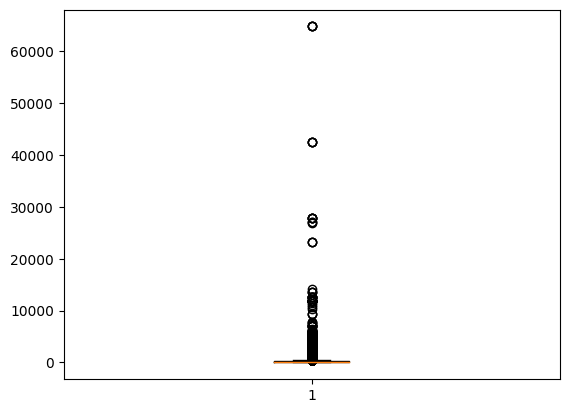

In [132]:
import matplotlib.pyplot as plt

plt.boxplot(df['price'])
plt.show()

# outlier 판단


# 박스플롯(Boxplot)은 데이터의 분포를 시각화하고, 이상치(outliers)를 쉽게 식별할 수 있게 해줍니다. 
# 이는 데이터의 범위, 중앙값, 사분위수, 그리고 이상치를 시각적으로 이해하는 데 유용합니다.

# 유저 행동 데이터 알아보기
단순히 가입된 유저가 많다고 무조건 좋은 서비스는 아니다!
- ***활동하는 사용자(Active User)***가 많이 없으면 건강한 서비스는 아닐 것이다.
- 사용자가 활발하게 평소에도 자주 쓰는 서비스가 건강한 서비스가 될 수 있다.

## Active User
Active User는 ***특정 기간***안에 서비스를 방문한 ***유니크한 사용자의 수***
> 방문은 각 서비스마다 다르게 정의할 수 있다. 로그인을 해야 방문한 건지, 단순히 들어오기만 하면 방문인지

Unique User는 정해진 기한 내에 방문을 아무리 여러 번 했다 하더라도 실제 방문을 1번으로 카운트한 유저의 수
  - 싸이월드 미니홈피에 하루에 1명이 100번 방문 -> Unique User : 1
  - 싸이월드 미니홈피에 하루에 100명이 1번 방문 -> Unique User : 100

**Daily Active User(DAU)**
- 하루 동안(24시간) 방문한 Unique한 유저의 수

**Weekly Active User(WAU)**
- 일주일(7일)동안 방문한 Unique한 유저의 수

**Montly Active User(MAU)**
- 한 달(30일) 동안 방문한 Unique한 유저의 수


## DAU / MAU
한달 동안 사용자가 얼마나 자주 방문하는 서비스 인지를 알 수 있는 지표
1. DAU/MAU = 3.3% (0.033)


- 뜻: 

DAU가 MAU의 3.3%라는 것은, 한 달 동안 평균적으로 같은 사용자가 매일 방문하지 않는다는 것을 의미합니다.

- 예시:

만약 한 달에 100명의 사용자가 있다면, 하루에 평균 3.3명만 방문한다는 뜻입니다.


- 추론:
    
한 달 동안 거의 새로운 사용자가 매일매일 유입된다고 볼 수 있습니다.

한 번 활동한 사용자는 다시 방문하지 않는 경향이 있습니다.

2. DAU/MAU = 100% (1.0)

- 뜻: 

DAU가 MAU의 100%라는 것은, 한 달 동안 서비스에 방문한 모든 사용자가 매일매일 방문한다는 것을 의미합니다.


- 예시:


만약 한 달에 100명의 사용자가 있다면, 하루에 평균 100명 모두가 매일 방문한다는 뜻입니다.


- 추론:


이 서비스는 사용자들이 매일매일 사용하는 매우 인기 있는 서비스입니다.

## Active User의 장 단점
**장점**
- 거의 모든 서비스에서 쉽게 구할 수 있다.
- 자주 사용되는 지표

**단점**
- 사용자의 Unique한 방문만 보기 때문에 서비스 내에 유저가 들어와서 얼마나 활발하게 활동하는지는 측정이 불가
  - 얼마나 서비스를 적극적으로 활용하는지
  - 서비스에 들어와서 구매로 전환은 되는지 등은 알기 힘들다.

# 월별, 주별, 일별 시간에 따른 유저수의 변화 살펴보기
- view(상품 보기)
- cart(장바구니 담기)
- remove_from_cart(장바구니에서 제거)
- purchase( 구매하기 )

## Daily Active User( 기간 : 매일 )

In [133]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [134]:
# 시리즈 뒤에 .str을 붙이면 시리즈 내의 각 데이터를 문자열처럼 취급할 수 있다.

df['event_date'] = df['event_time'].str[:10] #시간을 문자열로 끊어서 쓰는 거 매우 비추천. 날짜는 날짜처럼 다루는 것이 좋음
df['event_date_dtm_format'] = pd.to_datetime(df['event_date'])

df.head()

# df.info()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020-09-24,2020-09-24
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-24,2020-09-24
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020-09-24,2020-09-24
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020-09-24,2020-09-24
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020-09-24,2020-09-24


In [135]:
# 임의로 10월 1일 이후 데이터만 사용
df = df.loc[df['event_date'] > '2020-09-30']
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01


In [136]:
# nunique 함수를 이용해 중복되지 않은 카운트 세기
# [1,1,1,2,2,2,2,3,3,3,3,4,4,4,4] -> nunqiue -> 4

dau_data = df.groupby('event_date')['user_id'].nunique()

dau_data.head(10)

event_date
2020-10-01    2699
2020-10-02    2559
2020-10-03    2162
2020-10-04    2398
2020-10-05    2832
2020-10-06    2676
2020-10-07    2561
2020-10-08    2661
2020-10-09    2416
2020-10-10    2115
Name: user_id, dtype: int64

In [137]:
# 인덱스를 초기화하고, 기존 인덱스를 데이터프레임의 새로운 열로 변환

dau_data = dau_data.reset_index()
dau_data.head()

,event_date,user_id
0,2020-10-01,2699
1,2020-10-02,2559
2,2020-10-03,2162
3,2020-10-04,2398
4,2020-10-05,2832


In [138]:
# user_count 이름 바꾸기

dau_data = dau_data.rename(
    columns={'user_id':'user_count'}
)

dau_data.head()

,event_date,user_count
0,2020-10-01,2699
1,2020-10-02,2559
2,2020-10-03,2162
3,2020-10-04,2398
4,2020-10-05,2832


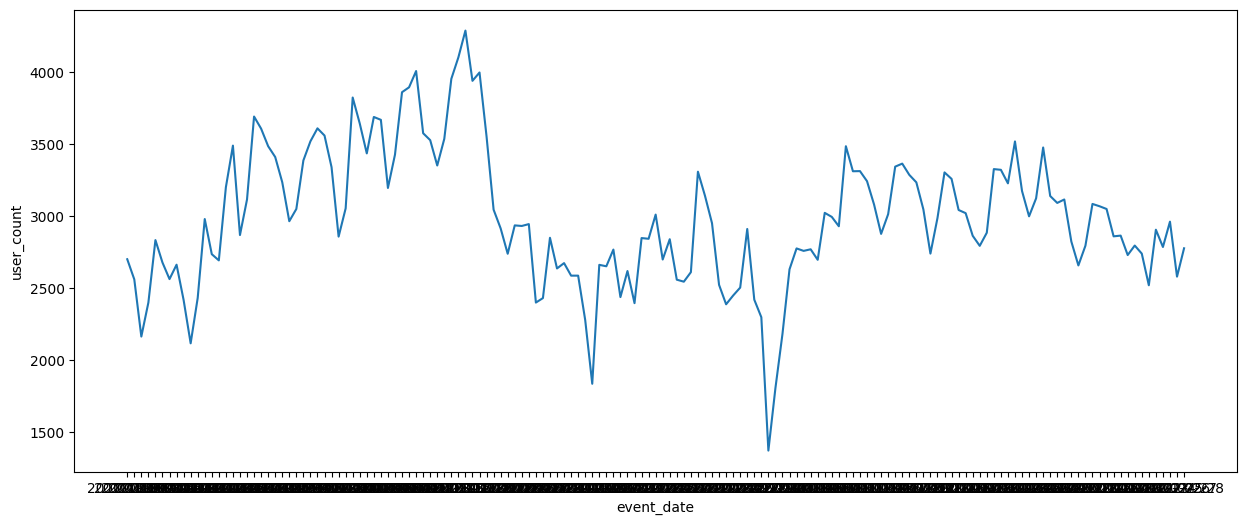

In [139]:
import seaborn as sns

g = sns.lineplot(x='event_date', y='user_count', data = dau_data)

g.figure.set_size_inches(15, 6)

plt.show()

# x축이 마음에 들지 않는다.

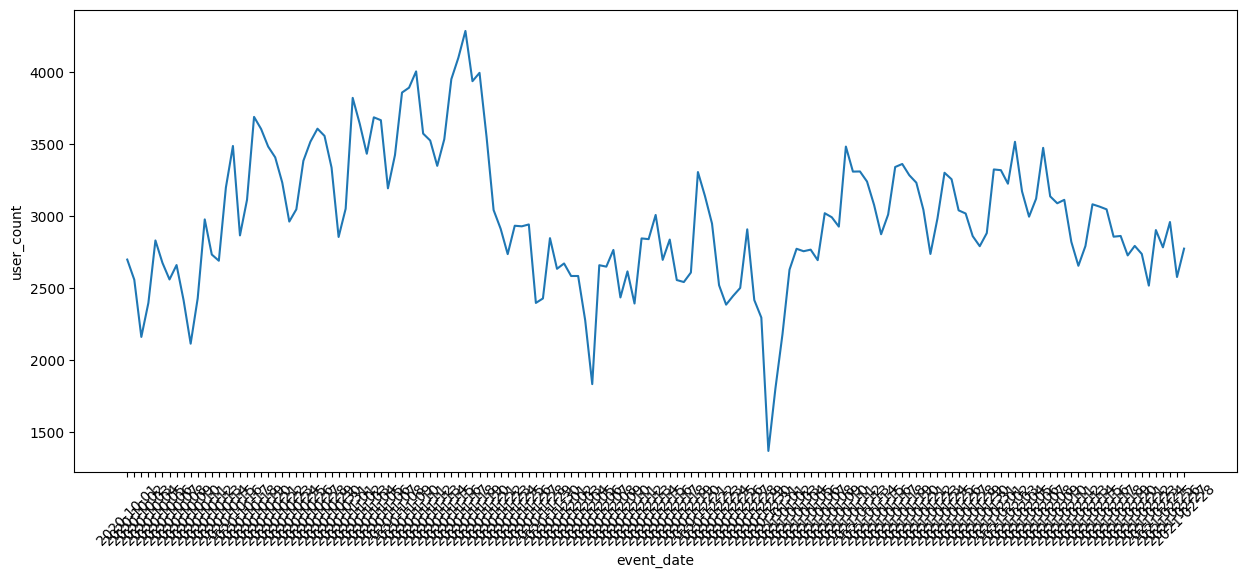

In [140]:
import seaborn as sns

g = sns.lineplot(x='event_date', y='user_count', data = dau_data)

g.figure.set_size_inches(15, 6)

plt.xticks(rotation=45)

plt.show()

# 이래도 마음에 들지 않는다

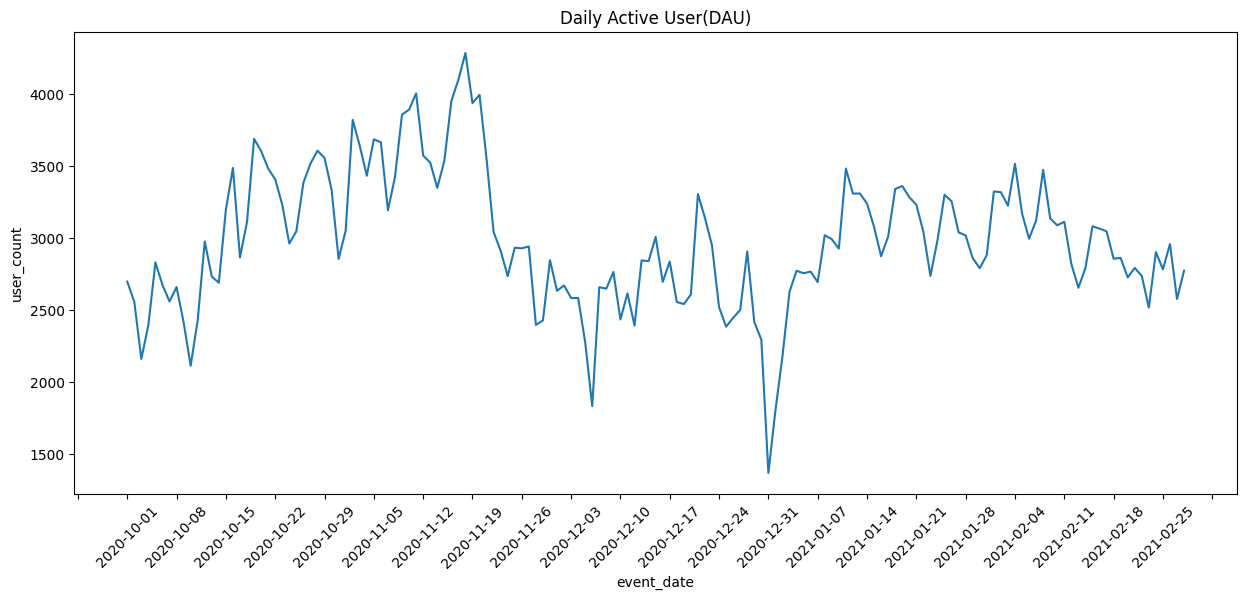

In [141]:
import matplotlib.ticker as ticker
import seaborn as sns

g = sns.lineplot(x='event_date', y='user_count', data = dau_data)
g.figure.set_size_inches(15, 6)

g.xaxis.set_major_locator(ticker.MultipleLocator(7)) # 일주일에 한번씩 티커 표시
g.set_title("Daily Active User(DAU)")

plt.xticks(rotation=45)
plt.show()

#이렇게 하니 좀 나은 거 같다.

## Weekly Active User(기간: Weekly)

In [142]:
# 년도별 정보 / 주차별 정보 같이 필요: 1년은 52주다 + 1년이 지나면 다시 1주차부터 시작한다

df['year_week_number'] = df['event_date_dtm_format'].dt.strftime("%Y-w%U")

df[['year_week_number', 'event_date']].head()



,year_week_number,event_date
28074,2020-w39,2020-10-01
28075,2020-w39,2020-10-01
28076,2020-w39,2020-10-01
28077,2020-w39,2020-10-01
28078,2020-w39,2020-10-01


In [143]:
wau_data = df.groupby("year_week_number")["user_id"].nunique().to_frame().reset_index()
wau_data.head()

,year_week_number,user_id
0,2020-w39,7141
1,2020-w40,16633
2,2020-w41,19305
3,2020-w42,22179
4,2020-w43,21956


In [144]:
wau_data = wau_data.rename(
    columns={
        "user_id": "user_count"
    }
)

In [145]:
wau_data.head()

,year_week_number,user_count
0,2020-w39,7141
1,2020-w40,16633
2,2020-w41,19305
3,2020-w42,22179
4,2020-w43,21956


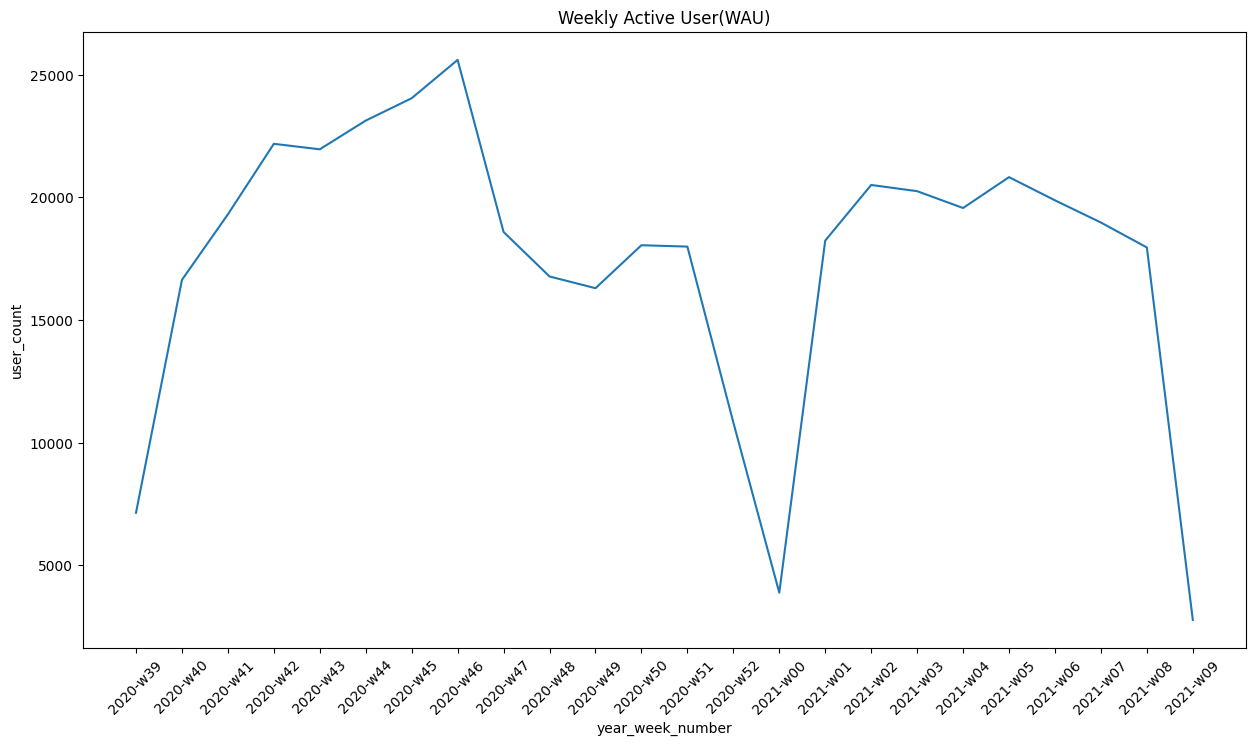

In [146]:
# g : 그래프(시각화 객체)
g = sns.lineplot(x='year_week_number', y='user_count', data=wau_data)

# 그래프의 가로 세로 길이를 인치 단위로 수정정
g.figure.set_size_inches(15, 8)

g.set_title("Weekly Active User(WAU)")


plt.xticks(rotation=45)
plt.show()


# 시계열 단위의 데이터는 특정 시기에 왜 이상하게 user_count가 떨어졌는지를 이해할 수 있어야 함
# 2020w_52는 일,월,화,수,목요일까지만 한주가 책정 됐기 때문

In [147]:
# 주별 day의 합을 구해보기 -> 주차별 일수 (1주일에 7일 치 데이터가 잘 들어가 있는가?)

df.groupby("year_week_number")["event_date"].nunique()

# 52w , w00은 같은 주이기에 합쳐주는 것이 좋을 것 같다. 일월화수목 + 금토

year_week_number
2020-w39    3
2020-w40    7
2020-w41    7
2020-w42    7
2020-w43    7
2020-w44    7
2020-w45    7
2020-w46    7
2020-w47    7
2020-w48    7
2020-w49    7
2020-w50    7
2020-w51    7
2020-w52    5
2021-w00    2
2021-w01    7
2021-w02    7
2021-w03    7
2021-w04    7
2021-w05    7
2021-w06    7
2021-w07    7
2021-w08    7
2021-w09    1
Name: event_date, dtype: int64

In [148]:
# 2021-w00을 2020-w52로 바꾸기

df.loc[df['year_week_number'] == '2021-w00', "year_week_number"] = "2020-w52"
df.groupby("year_week_number")['event_date'].nunique()

year_week_number
2020-w39    3
2020-w40    7
2020-w41    7
2020-w42    7
2020-w43    7
2020-w44    7
2020-w45    7
2020-w46    7
2020-w47    7
2020-w48    7
2020-w49    7
2020-w50    7
2020-w51    7
2020-w52    7
2021-w01    7
2021-w02    7
2021-w03    7
2021-w04    7
2021-w05    7
2021-w06    7
2021-w07    7
2021-w08    7
2021-w09    1
Name: event_date, dtype: int64

In [149]:
# drop을 할 때는 보통 칼럼에 대한 drop을 수행하는 게 일반적
# (drop이 버린다가 아니라 선택을 하지 않는다는 개념으로 생각하기)

# 2020-w39, 2021-w09만 제외하고 선택하기

df_count_over_7 = df.loc[ df['year_week_number'] != '2020-w39', :]
df_count_over_7 = df_count_over_7.loc[ df_count_over_7['year_week_number'] != '2021-w09', :]

df_count_over_7.groupby("year_week_number")["event_date"].nunique()

year_week_number
2020-w40    7
2020-w41    7
2020-w42    7
2020-w43    7
2020-w44    7
2020-w45    7
2020-w46    7
2020-w47    7
2020-w48    7
2020-w49    7
2020-w50    7
2020-w51    7
2020-w52    7
2021-w01    7
2021-w02    7
2021-w03    7
2021-w04    7
2021-w05    7
2021-w06    7
2021-w07    7
2021-w08    7
Name: event_date, dtype: int64

In [150]:
wau_data = df_count_over_7.groupby("year_week_number")['user_id'].nunique().reset_index()
wau_data.head()

,year_week_number,user_id
0,2020-w40,16633
1,2020-w41,19305
2,2020-w42,22179
3,2020-w43,21956
4,2020-w44,23126


In [151]:
wau_data = df_count_over_7.groupby('year_week_number')['user_id'].nunique().reset_index()

wau_data = wau_data.rename(
    columns={
        'user_id': 'user_count'
    }
)

wau_data.head()

,year_week_number,user_count
0,2020-w40,16633
1,2020-w41,19305
2,2020-w42,22179
3,2020-w43,21956
4,2020-w44,23126


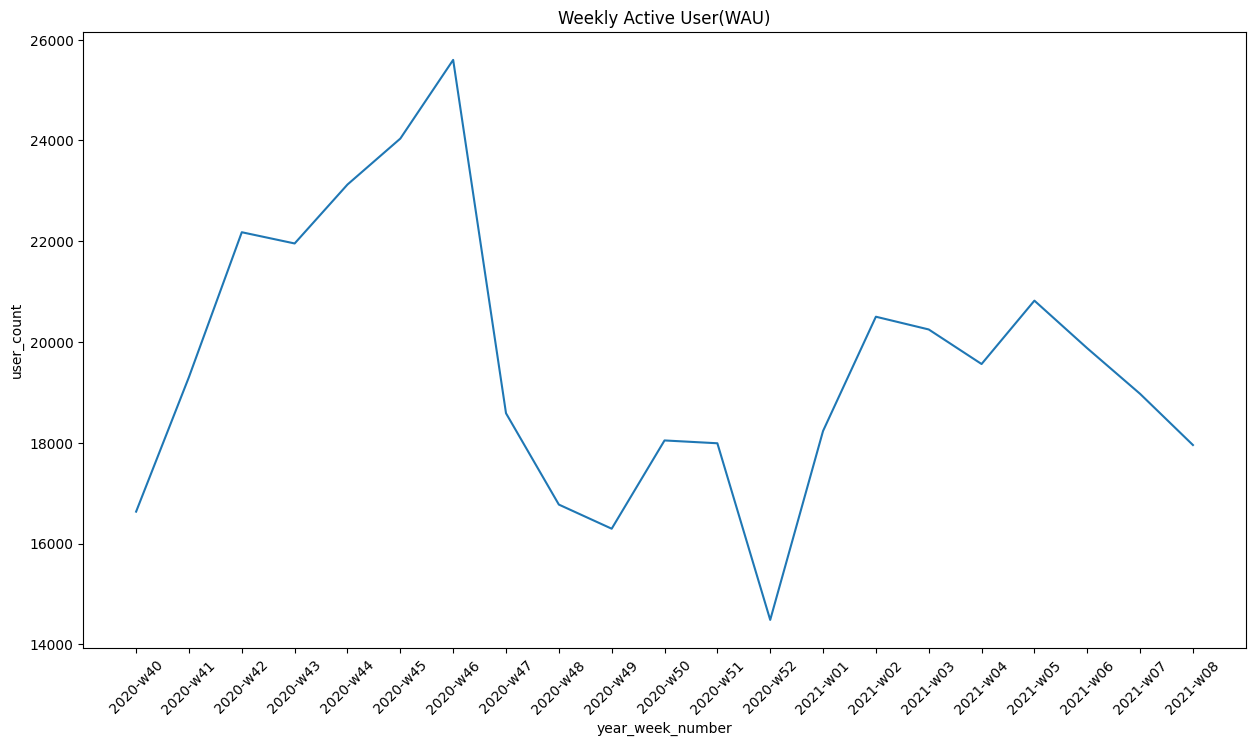

In [152]:
# g : 그래프(시각화 객체)
g = sns.lineplot(x='year_week_number', y='user_count', data=wau_data)

# 그래프의 가로 세로 길이를 인치 단위로 수정정
g.figure.set_size_inches(15, 8)

g.set_title("Weekly Active User(WAU)")


plt.xticks(rotation=45)
plt.show()

In [153]:
# 그래프에서 바닥에 붙어 있는 부분이 마음에 들지 않는다
# y축 범위를 늘려 좀 더 그래프가 떠 보이게 하자

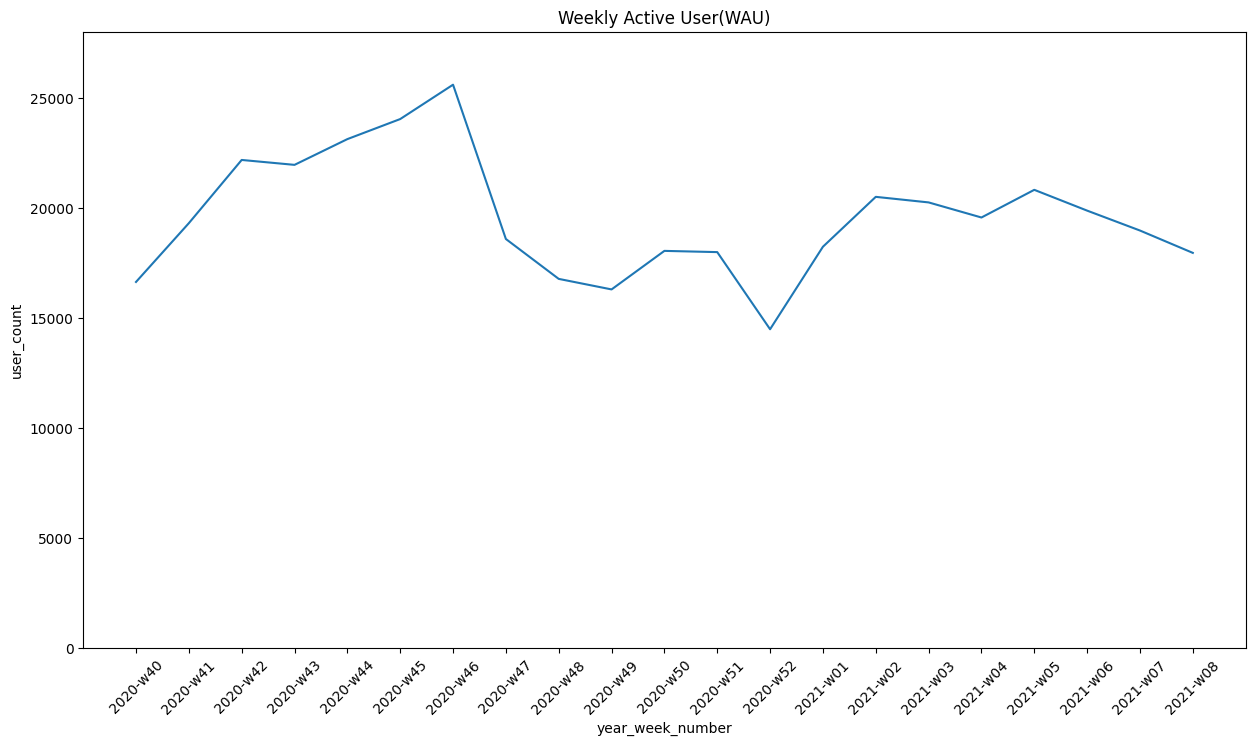

In [154]:
# g : 그래프(시각화 객체)
g = sns.lineplot(x='year_week_number', y='user_count', data=wau_data)

# 그래프의 가로 세로 길이를 인치 단위로 수정정
g.figure.set_size_inches(15, 8)

g.set_title("Weekly Active User(WAU)")

g.set_ylim(0, 28000)
plt.xticks(rotation=45)
plt.show()

## Monthly Active User(기간: 월 단위)
굵은 텍스트

In [155]:
df['event_month'] = df['event_date_dtm_format'].dt.strftime("%Y-%m")
df['event_month']

28074     2020-10
28075     2020-10
28076     2020-10
28077     2020-10
28078     2020-10
           ...   
885124    2021-02
885125    2021-02
885126    2021-02
885127    2021-02
885128    2021-02
Name: event_month, Length: 857055, dtype: object

In [156]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number,event_month
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39,2020-10
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39,2020-10
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39,2020-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885124,2021-02-28 23:55:01 UTC,view,953226,2144415927553229037,NaN,NaN,219.94,1515915625611023730,FRLqIttxKU,2021-02-28,2021-02-28,2021-w09,2021-02
885125,2021-02-28 23:58:05 UTC,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma,2021-02-28,2021-02-28,2021-w09,2021-02
885126,2021-02-28 23:58:09 UTC,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd,2021-02-28,2021-02-28,2021-w09,2021-02
885127,2021-02-28 23:58:14 UTC,view,888273,2144415921932861531,electronics.telephone,NaN,10.16,1515915625611024030,9pCbKMIcSx,2021-02-28,2021-02-28,2021-w09,2021-02


In [157]:
mau_data = df.groupby('event_month')['user_id'].nunique().reset_index()

mau_data = mau_data.rename(
    columns={
        'user_id': 'user_count'
    }
)

mau_data.head()

,event_month,user_count
0,2020-10,84216
1,2020-11,92600
2,2020-12,72137
3,2021-01,81256
4,2021-02,74606


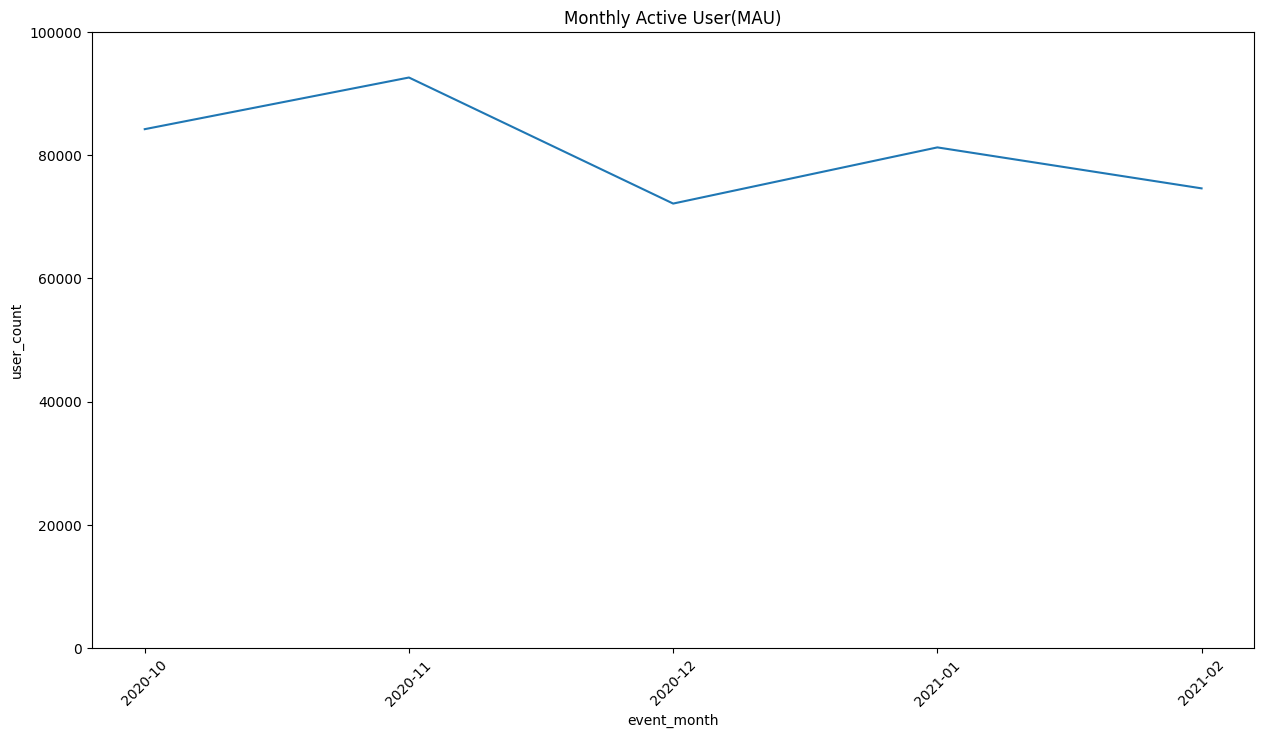

In [158]:
# g : 그래프(시각화 객체)
g = sns.lineplot(x='event_month', y='user_count', data=mau_data)

# 그래프의 가로 세로 길이를 인치 단위로 수정
g.figure.set_size_inches(15, 8)

g.set_title("Monthly Active User(MAU)")

g.set_ylim(0, 100000)
plt.xticks(rotation=45)
plt.show()

## DAU / MAU

- 전체 DAU 평균 / 전체 MAU의 평균
  - 가지고 있는 모든 데이터를 기반으로 DAU / MAU 구하기
- 월별 DAU 평균 / 해당 월의 MAU
  - 월별 DAU / MAU 구하기
  - [과제] 월별 DAU/MAU 시각화 하기

In [159]:
mean_daily_user = dau_data['user_count'].mean()
mean_monthly_user = mau_data['user_count'].mean()

dau_mau_ratio = mean_daily_user / mean_monthly_user

print(f"DAU / MAU : {dau_mau_ratio*100:.3f}%")

DAU / MAU : 3.687%


# 유저 수와 세션 수
## 세션
유저가 처음 방문해서 서비스를 사용하다가 서비스에서 나가기까지의 여정을 1 세션으로 간주한다.

오전에 서비스를 한번 방문해서 상품을 구매하고, 저녁에 다시 들어와서 그냥 나갔다면 유저(Active User)는 1번이지만, 세션 수로는 2번이 된다.

### 세션의 기준

- 브라우저
  - 유저가 서비스를 나간다는 명확한 의사 표시가 없는 경우가 많다.
    - 그냥 페이지 틀어 놓고 다른 탭 가서 놀고 들어오고 등등....
  - 클릭과 다음 클릭 사이의 30분 이상일 때, 다음 클릭부터 새 세션으로 간주
    - 구글 애널리틱스 등등에서 유저 분석 데이터를 분석할 때의 기준이 30분
- 모바일
  - 앱이 백그라운드 모드에 있다가 포그라운드 모드로 전환하면 그 때부터 새 세션으로 간주

### 세션수와 유저수 + 페이지뷰수(Page View)
**화면이 전환되는 것을 기준으로 +1을 더한다.**
- 예를 들어 회원가입 페이지(+1) -> 로그인 페이지 (+1) -> 메인 페이지 (+1)

클릭 수와 비교해 보기
- 같은 페이지 내에서도 유저가 마우스로 클릭하거나, 터치를 하면 +1이 된다.
- 같은 페이지 내에서 유저가 얼마나 많은 컨텐츠를 보는지, 어디까지 스크롤 내리는지, 체류시간 등을 통해 유저의 해당 페이지에 대한 관심도를 측정할 수 있다.



### 세션수와 유저수, 페이지뷰수 비교하기
- 유저수 대비 페이지뷰 수가 많다면?
  - 유저들이 서비스를 적극적으로 활동한다.
  - 건강한 서비스!
- 유저수 대비 페이지뷰 수가 적다면?
  - 유저들이 서비스를 적극적으로 활용하지 않는다.
  - 건강하지 않은 서비스..ㅠㅠ
- 유저수와 세션수가 같다면?
  - 하루에 한번 정도만 서비스를 이용한다.
- 유저수 대비 세션수, 페이지뷰가 많다면?
  - 유저가 하루에도 여러 번 방문한다.

In [160]:
# 일별 unique user 수 (DAU)
# 세션 unique 수 (유저가 들어와서 몇 개의 세션을 발생 시키는지)
# 이벤트 수 : 유저가 서비스에 들어와서 몇 번의 이벤트를 발생 시켰는지를 보기 위함(PV)


df_unique_user_and_session = df[['user_id', 'user_session', 'event_time', 'event_date']]
df_unique_user_and_session

,user_id,user_session,event_time,event_date
28074,1515915625520113390,4X2NwIInsI,2020-10-01 00:01:36 UTC,2020-10-01
28075,1515915625521278799,daM8ubpOfo,2020-10-01 00:04:11 UTC,2020-10-01
28076,1515915625521278938,EdgYsorbdC,2020-10-01 00:07:23 UTC,2020-10-01
28077,1515915625520113390,4X2NwIInsI,2020-10-01 00:07:56 UTC,2020-10-01
28078,1515915625521279091,Et4GWStGMB,2020-10-01 00:08:11 UTC,2020-10-01
...,...,...,...,...
885124,1515915625611023730,FRLqIttxKU,2021-02-28 23:55:01 UTC,2021-02-28
885125,1515915625611024014,g6WqPf50Ma,2021-02-28 23:58:05 UTC,2021-02-28
885126,1515915625611024020,xNIJBqZdkd,2021-02-28 23:58:09 UTC,2021-02-28
885127,1515915625611024030,9pCbKMIcSx,2021-02-28 23:58:14 UTC,2021-02-28


In [161]:
# agg = aggregation

df_unique_user_and_session_agg  = df_unique_user_and_session.groupby("event_date").agg(['nunique', 'count']) # 멀티 인덱스
df_unique_user_and_session_agg.head()

# 여기서 이벤트 수는 뷰 카운트

# 확인할 수 있는 정보
# ex. 2000명 정도는 하루에 두번 정도 들어오는 거 같다






user_id       user_session       event_time      
           nunique count      nunique count    nunique count
event_date                                                  
2020-10-01    2699  4657         2847  4654       4500  4657
2020-10-02    2559  4555         2728  4554       4397  4555
2020-10-03    2162  3774         2271  3774       3666  3774
2020-10-04    2398  4413         2529  4413       4231  4413
2020-10-05    2832  4982         3002  4981       4790  4982

In [162]:
df_unique_user_and_session_agg.columns

# user_id 같은 경우는 nunique를 쓰는 것이 옳음(중복 X)
# user_session 같은 경우도 어떤 행위들을 하기 위해 사이트를 들어간 것을 봐야 하기 때문에 nunique를 쓰는 것이 옳음(중복 X)
# event_time 같은 경우는 위 세션에서 행위를 의미하기에 count를 쓰는 것이 옳음(중복 O)

# 올리브영에 갔다(세션)
# ~~를 구경하고, ~를 다시 보고, ~~를 사고 ...(행위)

# 아래는 위 주석을 반영한 코드

MultiIndex([(     'user_id', 'nunique'),
            (     'user_id',   'count'),
            ('user_session', 'nunique'),
            ('user_session',   'count'),
            (  'event_time', 'nunique'),
            (  'event_time',   'count')],
           )

In [163]:
agg = df_unique_user_and_session_agg.sort_values('event_date')

user_session_agg_df = pd.DataFrame(
    {
        "user_count": agg[('user_id', 'nunique')],
        'session_count': agg[('user_session', 'nunique')],
        'event_count': agg[('event_time', 'count')]
    }
)

user_session_agg_df.head()

# 결과  - 원인 관계를 생각하면서 아래와 같이 의미 있는 수를 도출 가능
# session / user : 한명이 몇개 세션 발생?
# event / session : 세션이 몇개 이벤트 발생?
# event/ user : 한명이 이벤트 몇개 발생?

,user_count,session_count,event_count
event_date,,,
2020-10-01,2699,2847,4657
2020-10-02,2559,2728,4555
2020-10-03,2162,2271,3774
2020-10-04,2398,2529,4413
2020-10-05,2832,3002,4982


In [164]:
# 1) 유저 별 세션 수
# 유저가 하루에 몇 번 들어왔는지를 세어주는 것.
#      DAU / MAU 를 보니까 한달 안에 많이 들어오는 것 같지는 않음.
# 하루에는 몇 번 들어오나 확인하기 위함

user_session_agg_df['session_per_user'] = user_session_agg_df['session_count'] / user_session_agg_df['user_count']

# 2) 세션 별 이벤트 수
# 한 번 들어와서 몇 번의 이벤트를 발생시키는지 확인
# 이 수치가 크면 한 사용자가 한 번 접속해서 여러 번의 이벤트를 발생시킨 것. 작으면 활동을 많이 하지 않는다는 뜻

user_session_agg_df['click_per_session'] = user_session_agg_df['event_count'] / user_session_agg_df['session_count']

user_session_agg_df.head()



# 과제
#  * 구매를 할 때 여러 번 들어오는지, 여러 번 간격을 두고 들어오는지, 한번 들어와서 여러 개를 사는지 확인
#     purchase확인


,user_count,session_count,event_count,session_per_user,click_per_session
event_date,,,,,
2020-10-01,2699,2847,4657,1.054835,1.635757
2020-10-02,2559,2728,4555,1.066041,1.669721
2020-10-03,2162,2271,3774,1.050416,1.661823
2020-10-04,2398,2529,4413,1.054629,1.744958
2020-10-05,2832,3002,4982,1.060028,1.659560


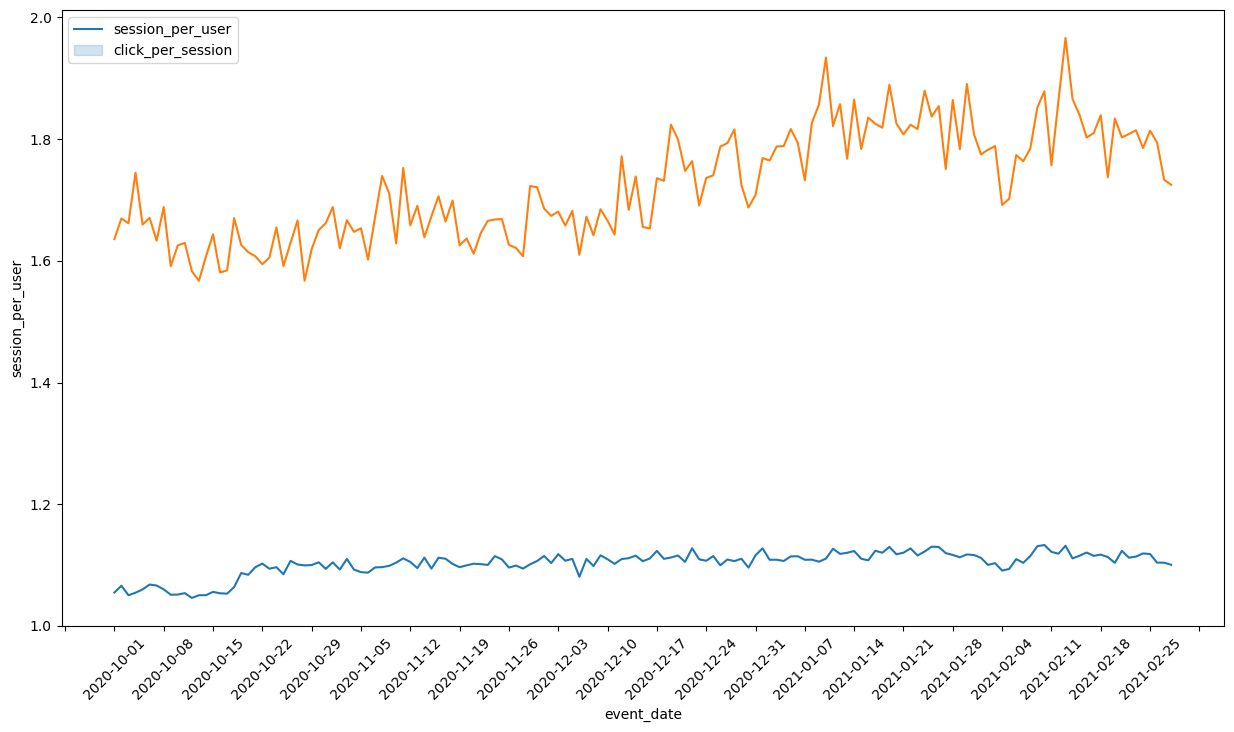

In [165]:
g = sns.lineplot(x='event_date', y='session_per_user', data=user_session_agg_df)
g = sns.lineplot(x='event_date', y='click_per_session', data=user_session_agg_df)

g.figure.set_size_inches(15, 8)

g.xaxis.set_major_locator(ticker.MultipleLocator(7)) # 축의 간격을 7배로 설정

plt.legend(["session_per_user", "click_per_session"])
plt.xticks(rotation=45)
plt.show()

# 코호트 분석
코호트란?
- **공통된 특성을 공유하는 집단**

코호트 분석이란?

- 동일 집단끼리 울타리(코호트)로 묶고, **다른 집단과 기간 별 행동이나 패턴을 비교**하는 것

ex.

세로는 날짜 별 방문한 유저수, 가로는 해당 유저군의 날짜 별 재방문율

<img src="https://assets-global.website-files.com/5c7fdbdd4e3feeee8dd96dd2/6137996d331da22022f509f0_1.png" />

위의 표를 보면, 처음 방문한 사람이 다음날도 재방문 하는 비율이 점점 떨어져 간다는 것을 알 수 있다.( 33% -> 24%)

**코호트 분석의 의미**

<img src="https://analyticsmarketing.co.kr/wp-content/uploads/2017/08/%EA%B5%AC%EA%B8%80%EC%95%A0%EB%84%90%EB%A6%AC%ED%8B%B1%EC%8A%A4_%EC%BD%94%ED%98%B8%ED%8A%B8_03.png"/>

이 지표만 보면 점점 **고객당 평균 매출**이 떨어져 보인다! 하지만 코호트 분석으로 보게 된다면?

<img src="https://analyticsmarketing.co.kr/wp-content/uploads/2017/08/%EA%B5%AC%EA%B8%80%EC%95%A0%EB%84%90%EB%A6%AC%ED%8B%B1%EC%8A%A4_%EC%BD%94%ED%98%B8%ED%8A%B8_03-2.png"/>

신규 사용자의 매출은 점점 늘어나고 있다. 즉 코호트 분석으로 보면 신규방문자의 평균 매출은 계속 증가하고 있음을 알 수 있다. 하나의 지표로 표현되지 않는 **추세(Trend)**를 알 수 있다!


처음 구매한 사람이 1달 뒤에 재구매를 어떻게 하는지 패턴을 파악
- 재구매율 분석

In [184]:
df['order_month'] = df['event_date_dtm_format'].dt.strftime("%Y-%m")
df.head()

# df.info()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number,event_month,order_month
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10


In [167]:
order_data = df.loc[df['event_type'] == 'purchase']
order_data.head()

# 보통 ID로 그룹화를 하는 경우는 거의 없지만 이 경우는 코호트 분석을 위해 user_id로 그룹화

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number,event_month,order_month
28089,2020-10-01 00:16:49 UTC,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,1515915625521279407,Wxlmf9UuHZ,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28094,2020-10-01 00:21:18 UTC,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,1515915625521279407,Wxlmf9UuHZ,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28104,2020-10-01 00:31:26 UTC,purchase,1400177,2144415922528452715,electronics.telephone,NaN,19.52,1515915625521280982,EZdDgY36Lh,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28117,2020-10-01 00:39:19 UTC,purchase,1006569,2144415930019479855,electronics.telephone,NaN,12.70,1515915625521281502,wMoJBWUEvr,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
28118,2020-10-01 00:39:19 UTC,purchase,1034353,2144415922528452715,electronics.telephone,NaN,28.41,1515915625521281502,wMoJBWUEvr,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10


In [168]:
first_order = order_data.groupby('user_id')['order_month'].min().to_frame()
first_order.head()

,order_month
user_id,
1515915625353286099,2020-10
1515915625353534622,2020-10
1515915625353561691,2020-11
1515915625353900095,2020-10
1515915625354561351,2020-10


In [169]:
first_order = first_order.rename(
    columns = {
        "order_month": "first_order_month"
    }
)

first_order.head()

,first_order_month
user_id,
1515915625353286099,2020-10
1515915625353534622,2020-10
1515915625353561691,2020-11
1515915625353900095,2020-10
1515915625354561351,2020-10


In [170]:
order_data = order_data.set_index("user_id")

order_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,event_date,event_date_dtm_format,year_week_number,event_month,order_month
user_id,,,,,,,,,,,,,
1515915625521279407,2020-10-01 00:16:49 UTC,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,Wxlmf9UuHZ,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
1515915625521279407,2020-10-01 00:21:18 UTC,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,Wxlmf9UuHZ,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
1515915625521280982,2020-10-01 00:31:26 UTC,purchase,1400177,2144415922528452715,electronics.telephone,NaN,19.52,EZdDgY36Lh,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
1515915625521281502,2020-10-01 00:39:19 UTC,purchase,1006569,2144415930019479855,electronics.telephone,NaN,12.70,wMoJBWUEvr,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10
1515915625521281502,2020-10-01 00:39:19 UTC,purchase,1034353,2144415922528452715,electronics.telephone,NaN,28.41,wMoJBWUEvr,2020-10-01,2020-10-01,2020-w39,2020-10,2020-10


In [171]:
# user id로 조인 but 판다스는 조인 없으니 merge로

order_data = order_data.merge(
    first_order,
    left_index=True, # 머지 수행 시에 왼쪽 DF(원래 있던 DF)의 행 인덱스를 사용
    right_index=True, # 머지 수행 시에 오른쪽 DF(새로 붙는 DF)의 행 인덱스를 사용
)

order_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,event_date,event_date_dtm_format,year_week_number,event_month,order_month,first_order_month
user_id,,,,,,,,,,,,,,
1515915625353286099,2020-10-03 11:23:44 UTC,purchase,1023383,2144415922016747613,computers.peripherals.wifi,zyxel,119.03,p5I1h2vk1T,2020-10-03,2020-10-03,2020-w39,2020-10,2020-10,2020-10
1515915625353534622,2020-10-06 10:01:55 UTC,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
1515915625353534622,2020-10-06 10:03:42 UTC,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
1515915625353534622,2020-10-06 10:29:25 UTC,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
1515915625353561691,2020-11-24 17:37:22 UTC,purchase,1507368,2144415922016747613,computers.peripherals.wifi,keenetic,172.86,UmL0qYoQh4,2020-11-24,2020-11-24,2020-w47,2020-11,2020-11,2020-11


In [172]:
order_data = order_data.reset_index()
order_data.head(10)

,user_id,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,event_date,event_date_dtm_format,year_week_number,event_month,order_month,first_order_month
0,1515915625353286099,2020-10-03 11:23:44 UTC,purchase,1023383,2144415922016747613,computers.peripherals.wifi,zyxel,119.03,p5I1h2vk1T,2020-10-03,2020-10-03,2020-w39,2020-10,2020-10,2020-10
1,1515915625353534622,2020-10-06 10:01:55 UTC,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
2,1515915625353534622,2020-10-06 10:03:42 UTC,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
3,1515915625353534622,2020-10-06 10:29:25 UTC,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,2020-10-06,2020-w40,2020-10,2020-10,2020-10
4,1515915625353561691,2020-11-24 17:37:22 UTC,purchase,1507368,2144415922016747613,computers.peripherals.wifi,keenetic,172.86,UmL0qYoQh4,2020-11-24,2020-11-24,2020-w47,2020-11,2020-11,2020-11
5,1515915625353561691,2020-11-25 09:24:42 UTC,purchase,1507368,2144415922016747613,computers.peripherals.wifi,keenetic,172.86,UmL0qYoQh4,2020-11-25,2020-11-25,2020-w47,2020-11,2020-11,2020-11
6,1515915625353900095,2020-10-15 05:09:35 UTC,purchase,16237,2144415922360680550,computers.peripherals.camera,sven,18.10,12dadbda-acb5-4f26-a5e8-f71814190c04,2020-10-15,2020-10-15,2020-w41,2020-10,2020-10,2020-10
7,1515915625353900095,2020-10-15 05:09:35 UTC,purchase,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,12dadbda-acb5-4f26-a5e8-f71814190c04,2020-10-15,2020-10-15,2020-w41,2020-10,2020-10,2020-10
8,1515915625354561351,2020-10-02 07:32:16 UTC,purchase,3580373,2144415937770553861,stationery.stapler,p.i.t,51.68,UhhPeUCUpG,2020-10-02,2020-10-02,2020-w39,2020-10,2020-10,2020-10
9,1515915625354822642,2020-11-23 10:03:59 UTC,purchase,4035841,2144415922016747613,computers.peripherals.wifi,tp-link,120.27,YFpP7Gv3cY,2020-11-23,2020-11-23,2020-w47,2020-11,2020-11,2020-11


In [173]:
cohorts = order_data.groupby(["first_order_month", "order_month"])['user_id'].nunique()
cohorts

first_order_month  order_month
2020-10            2020-10        3796
                   2020-11          67
                   2020-12          17
                   2021-01           4
                   2021-02           4
2020-11            2020-11        4261
                   2020-12          68
                   2021-01          26
                   2021-02           7
2020-12            2020-12        3784
                   2021-01          68
                   2021-02          21
2021-01            2021-01        4673
                   2021-02         117
2021-02            2021-02        4192
Name: user_id, dtype: int64

In [174]:
cohorts = cohorts.reset_index()
cohorts = cohorts.rename(
    columns={
        'user_id': 'total_users'
    }
)

cohorts

,first_order_month,order_month,total_users
0,2020-10,2020-10,3796
1,2020-10,2020-11,67
2,2020-10,2020-12,17
3,2020-10,2021-01,4
4,2020-10,2021-02,4
5,2020-11,2020-11,4261
6,2020-11,2020-12,68
7,2020-11,2021-01,26
8,2020-11,2021-02,7
9,2020-12,2020-12,3784


In [175]:
cohorts['first_order_month_dt'] = pd.to_datetime(cohorts['first_order_month'], format="%Y-%m")
cohorts['order_month_dt'] = pd.to_datetime(cohorts['order_month'], format="%Y-%m")

cohorts

,first_order_month,order_month,total_users,first_order_month_dt,order_month_dt
0,2020-10,2020-10,3796,2020-10-01,2020-10-01
1,2020-10,2020-11,67,2020-10-01,2020-11-01
2,2020-10,2020-12,17,2020-10-01,2020-12-01
3,2020-10,2021-01,4,2020-10-01,2021-01-01
4,2020-10,2021-02,4,2020-10-01,2021-02-01
5,2020-11,2020-11,4261,2020-11-01,2020-11-01
6,2020-11,2020-12,68,2020-11-01,2020-12-01
7,2020-11,2021-01,26,2020-11-01,2021-01-01
8,2020-11,2021-02,7,2020-11-01,2021-02-01
9,2020-12,2020-12,3784,2020-12-01,2020-12-01


In [176]:
cohorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   first_order_month     15 non-null     object        
 1   order_month           15 non-null     object        
 2   total_users           15 non-null     int64         
 3   first_order_month_dt  15 non-null     datetime64[ns]
 4   order_month_dt        15 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 728.0+ bytes


In [177]:
# 날짜 차이 계산을 위해 peroid 형식으로 바꿔준다.
#  peroid : 시간의 기간을 표현할 수 있는 방식 하루, 이틀, 한달 두달, 일년, 이년...

# 시간의 기간을 계산 하는데, 1달 단위로 계산을 해서 정수형으로 확인
cohorts['order_month_dt'].dt.to_period('M').view(int)

0     609
1     610
2     611
3     612
4     613
5     610
6     611
7     612
8     613
9     611
10    612
11    613
12    612
13    613
14    613
Name: order_month_dt, dtype: int64

세계 협정 시(UTC - Universal Time Coordinate)
- 1970년 1월 1일 자정이 시작

In [178]:
# 파이썬에서 괄호 치고 코딩하면 여러 줄 코딩이 가능하다

cohorts['month_diff'] = (
    cohorts['order_month_dt'].dt.to_period('M').view(int)
    - cohorts['first_order_month_dt'].dt.to_period('M').view(int)
)

cohorts

,first_order_month,order_month,total_users,first_order_month_dt,order_month_dt,month_diff
0,2020-10,2020-10,3796,2020-10-01,2020-10-01,0
1,2020-10,2020-11,67,2020-10-01,2020-11-01,1
2,2020-10,2020-12,17,2020-10-01,2020-12-01,2
3,2020-10,2021-01,4,2020-10-01,2021-01-01,3
4,2020-10,2021-02,4,2020-10-01,2021-02-01,4
5,2020-11,2020-11,4261,2020-11-01,2020-11-01,0
6,2020-11,2020-12,68,2020-11-01,2020-12-01,1
7,2020-11,2021-01,26,2020-11-01,2021-01-01,2
8,2020-11,2021-02,7,2020-11-01,2021-02-01,3
9,2020-12,2020-12,3784,2020-12-01,2020-12-01,0


In [179]:
cols = ["first_order_month", "month_diff", "total_users"]
cohorts = cohorts[cols]
cohorts = cohorts.set_index(["first_order_month", "month_diff"])
cohorts

# first_order_month	month_diff는 여기서 인덱스 역할
# 유의미한 데이터는 total_users

total_users
first_order_month month_diff             
2020-10           0                  3796
                  1                    67
                  2                    17
                  3                     4
                  4                     4
2020-11           0                  4261
                  1                    68
                  2                    26
                  3                     7
2020-12           0                  3784
                  1                    68
                  2                    21
2021-01           0                  4673
                  1                   117
2021-02           0                  4192

In [180]:
cohorts = cohorts['total_users'].unstack(1) # 1번 인덱스를 컬럼으로 나누기. Long to Wide
cohorts

month_diff,0,1,2,3,4
first_order_month,,,,,
2020-10,3796.0,67.0,17.0,4.0,4.0
2020-11,4261.0,68.0,26.0,7.0,NaN
2020-12,3784.0,68.0,21.0,NaN,NaN
2021-01,4673.0,117.0,NaN,NaN,NaN
2021-02,4192.0,NaN,NaN,NaN,NaN


In [181]:
# 구매 유저수 -> 재 구매 유저수 비율
reorder_rate = cohorts.divide(cohorts[0], axis=0)
reorder_rate

month_diff,0,1,2,3,4
first_order_month,,,,,
2020-10,1.0,0.017650,0.004478,0.001054,0.001054
2020-11,1.0,0.015959,0.006102,0.001643,NaN
2020-12,1.0,0.017970,0.005550,NaN,NaN
2021-01,1.0,0.025037,NaN,NaN,NaN
2021-02,1.0,NaN,NaN,NaN,NaN


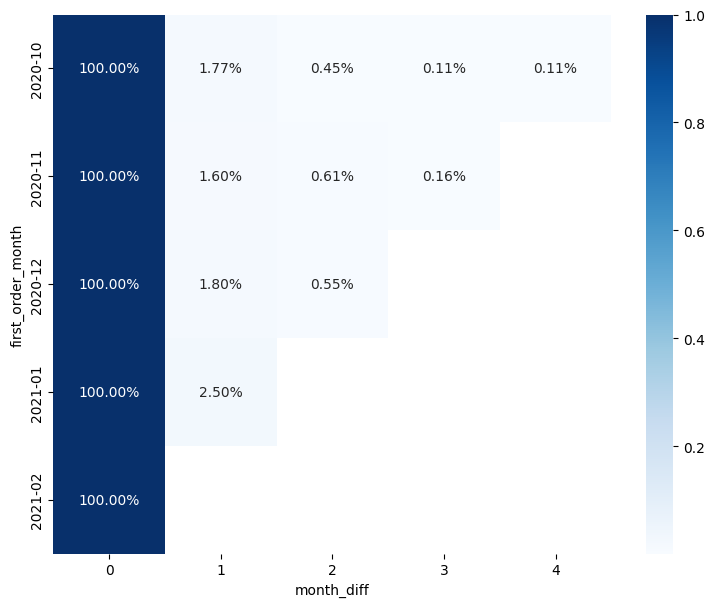

In [182]:
g = sns.heatmap(reorder_rate, annot=True, fmt=".2%", cmap='Blues')
g.figure.set_size_inches(9, 7)

plt.show()